In [1]:
import numpy as np 

from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.metrics import mean_squared_error

from gpr_custom import GaussianProcessRegressor
from hgpr import HGPR

import matplotlib.pyplot as plt 


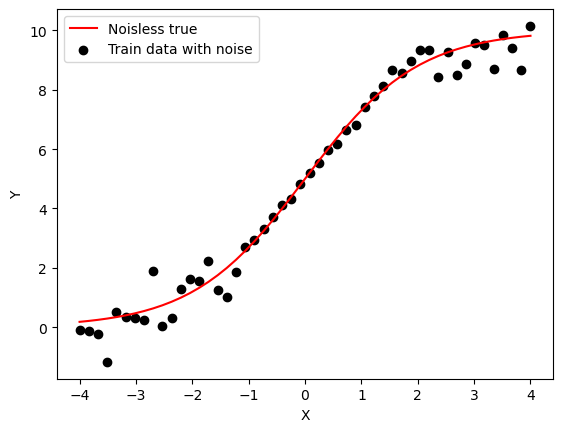

In [2]:
# target function
sigmoid = lambda x : 10 / (1 + np.exp(-x))

# test data 
n = 50
xmin, xmax = -4, 4
noise_level = 0.25 

X = np.linspace(xmin, xmax, n)
X_test = np.linspace(xmin, xmax, 4 * n)
Y = np.array([sigmoid(x) for x in X])
Y_noise = np.array([Y[i] + noise_level * np.abs(X[i]) * np.random.normal() for i in range(n)]) 


fig, ax = plt.subplots()
ax.plot(X, Y, color='red', label='Noisless true')
ax.scatter(X, Y_noise, color='black', label='Train data with noise')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

In [3]:
# define the model
kernel = C() * Matern() 
kernel_noise = C() * Matern() 

model = GaussianProcessRegressor(kernel=kernel, alpha_fit=True, n_restarts_optimizer=25)
model_noise = GaussianProcessRegressor(kernel=kernel_noise, alpha_fit=True, n_restarts_optimizer=25)

hgp = HGPR(model, model_noise, num_iters=15)

# fit the model
hgp.fit(X.reshape(-1, 1), Y_noise)

# make a prediction 
Y_pred, Std_pred = hgp.predict(X_test.reshape(-1, 1), return_std=True)

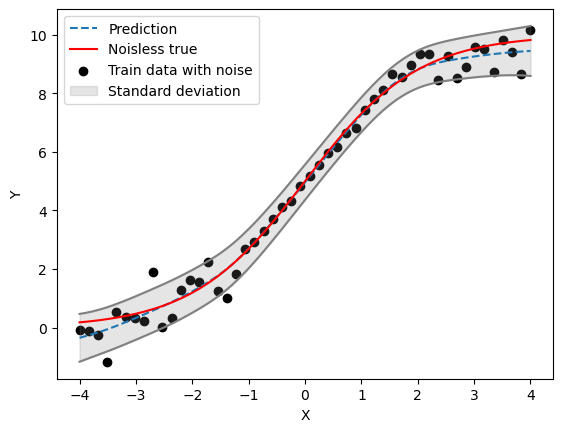

In [4]:
fig, ax = plt.subplots()

ax.plot(X_test, Y_pred, '--', label='Prediction')
ax.plot(X, Y, color='red', label='Noisless true')
ax.scatter(X, Y_noise, color='black', label='Train data with noise')
ax.fill_between(X_test, Y_pred - Std_pred, Y_pred + Std_pred, alpha=0.2, color='gray', label='Standard deviation')

ax.plot(X_test, Y_pred + Std_pred, color='gray')
ax.plot(X_test, Y_pred - Std_pred, color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()